In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris

#### 标准化

In [5]:
X, y = load_iris(return_X_y=True, as_frame=True)
columns = list('ABCD')
X.columns = columns
X

,A,B,C,D
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
print(type(X))  # 如果输出 <class 'sklearn.utils._bunch.Bunch'>，说明你错了


<class 'pandas.core.frame.DataFrame'>


In [7]:
X.describe().round(2)

,A,B,C,D
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
assert isinstance(X, pd.DataFrame), "X must be a pandas DataFrame"
X2 = pd.DataFrame(StandardScaler().fit_transform(X), columns=columns)
X2

,A,B,C,D
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [9]:
X2.describe().round(2)

,A,B,C,D
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


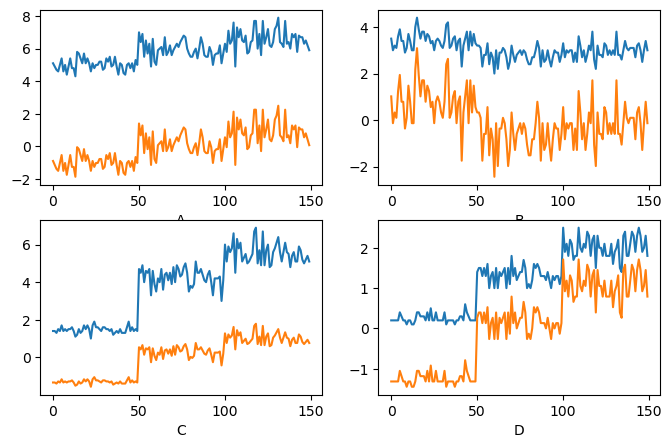

In [10]:
plt.figure(figsize=(8, 5))
for i in range (1, 5):
    plt.subplot(2, 2, i)
    plt.plot(X[columns[i - 1]])
    plt.plot(X2[columns[i - 1]])
    plt.xlabel(
        columns[i - 1]
    )

#### 最小值最大值归一化

In [ ]:
X3 = MinMaxScaler().fit_transform(X) # type: ignore
X3 = pd.DataFrame(X3, columns=columns)
X3.describe().round(2)

,A,B,C,D
count,150.00,150.00,150.00,150.00
mean,0.43,0.44,0.47,0.46
std,0.23,0.18,0.30,0.32
min,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.10,0.08
50%,0.42,0.42,0.57,0.50
75%,0.58,0.54,0.69,0.71
max,1.00,1.00,1.00,1.00


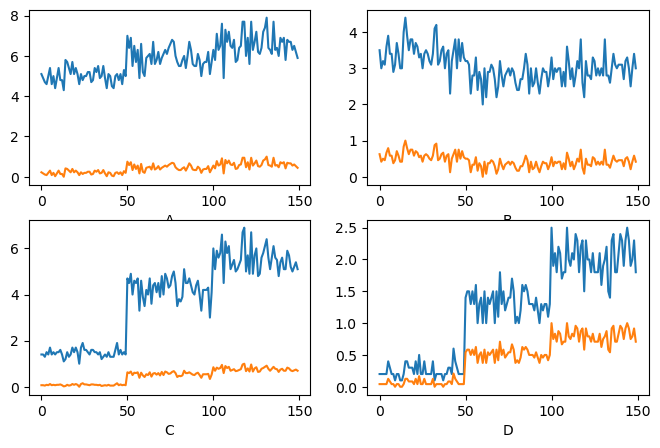

In [12]:
plt.figure(figsize=(8, 5))
for i in range (1, 5):
    plt.subplot(2, 2, i)
    plt.plot(X[columns[i - 1]])
    plt.plot(X3[columns[i - 1]])
    plt.xlabel(
        columns[i - 1]
    )

#### 等宽分箱

In [13]:
data = np.random.randn(100)
bins = pd.cut(data, bins=5)
bins.value_counts()

(-2.567, -1.566]     9
(-1.566, -0.569]    14
(-0.569, 0.427]     35
(0.427, 1.423]      31
(1.423, 2.419]      11
Name: count, dtype: int64

In [14]:
bins = pd.cut(data, bins=5, labels=list('ABCDE'))
bins

['C', 'E', 'D', 'E', 'B', ..., 'D', 'B', 'D', 'C', 'B']
Length: 100
Categories (5, object): ['A' < 'B' < 'C' < 'D' < 'E']

#### 等频分箱
```python
pd.cut(
   data,  # 一个列
   q,     # 分成几个箱
   labels # 不指定的话，区间就是箱的名字，否则指定的值就是箱的名字，数量要和bins对上
)
```

In [15]:
bin2 = pd.qcut(data, q=5)
bin2.value_counts()

(-2.5629999999999997, -0.692]    20
(-0.692, -0.0447]                20
(-0.0447, 0.476]                 20
(0.476, 1.073]                   20
(1.073, 2.419]                   20
Name: count, dtype: int64

#### 独热编码
```python
pd.get_dummies(
    data,            # 数据集
    columns,         # 要对哪些列做独热编码
    drop_first,      # 为True就是哑编码
    dummy_ma         # 是否把缺失值单独做为一列
)
```


In [16]:
size = pd.Series((['大'] * 5) + (['小'] * 5))
size

0    大
1    大
2    大
3    大
4    大
5    小
6    小
7    小
8    小
9    小
dtype: object

In [17]:
pd.get_dummies(size, drop_first=True)

,小
0,False
1,False
2,False
3,False
4,False
5,True
6,True
7,True
8,True
9,True


In [18]:
pd.get_dummies(size)

,大,小
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
5,False,True
6,False,True
7,False,True
8,False,True
9,False,True


#### 序列编码
```python
Series.map(
    arg # 传入一个字典（键值对），这个列的值会根据键值对一一映射
)


In [19]:
mapping = {
    "大": 1,
    "小": 0
}
size.map(mapping)

0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    0
dtype: int64

#### 多项式扩增

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
X1 = np.array(range(1, 11)).reshape(-1, 1)
X1

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [22]:
PolynomialFeatures(3).fit_transform(X1)

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

#### 对数变换


In [23]:
import seaborn as sns

<Axes: ylabel='Count'>

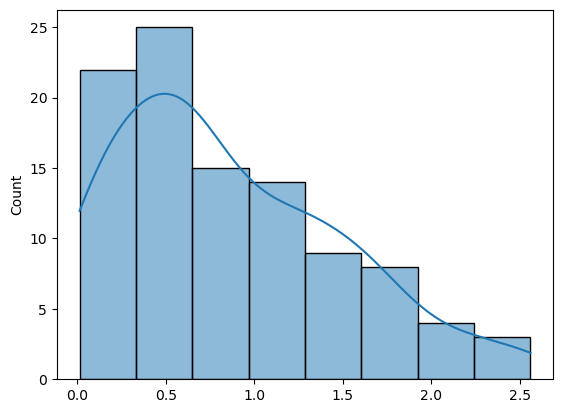

In [24]:
data = np.abs(data)
sns.histplot(data, kde=True)

<Axes: ylabel='Count'>

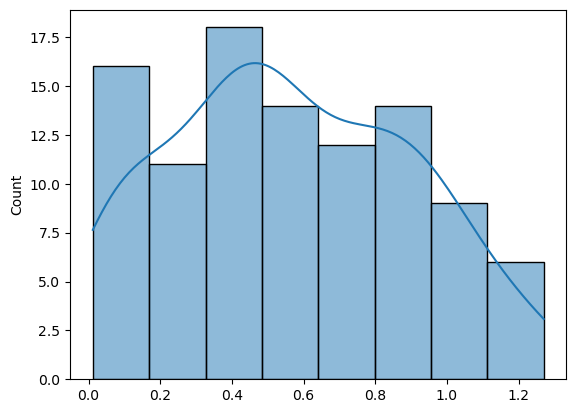

In [25]:
sns.histplot(np.log1p(data), kde=True)